##### Import the libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

##### Load the data

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

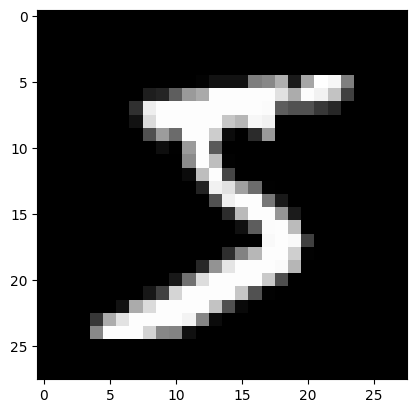

In [5]:
plt.imshow(x_train[0], cmap = 'gray')

In [6]:
y_train[0]

5

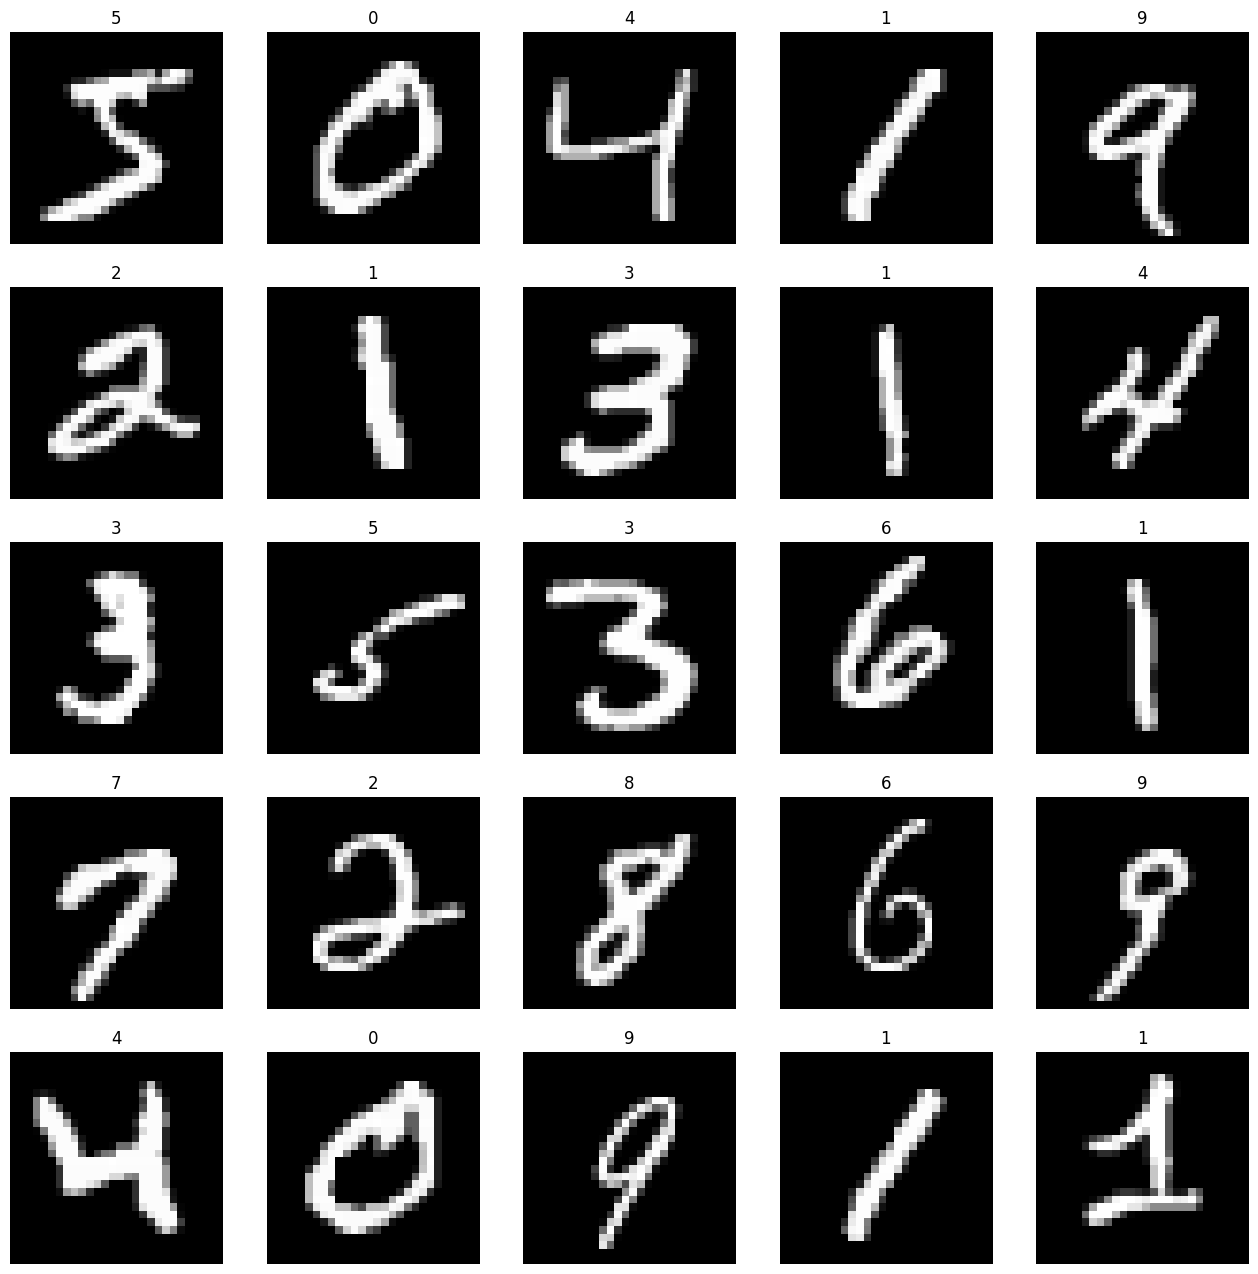

In [7]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap = 'gray')
    plt.axis('off')
    plt.title(y_train[i])

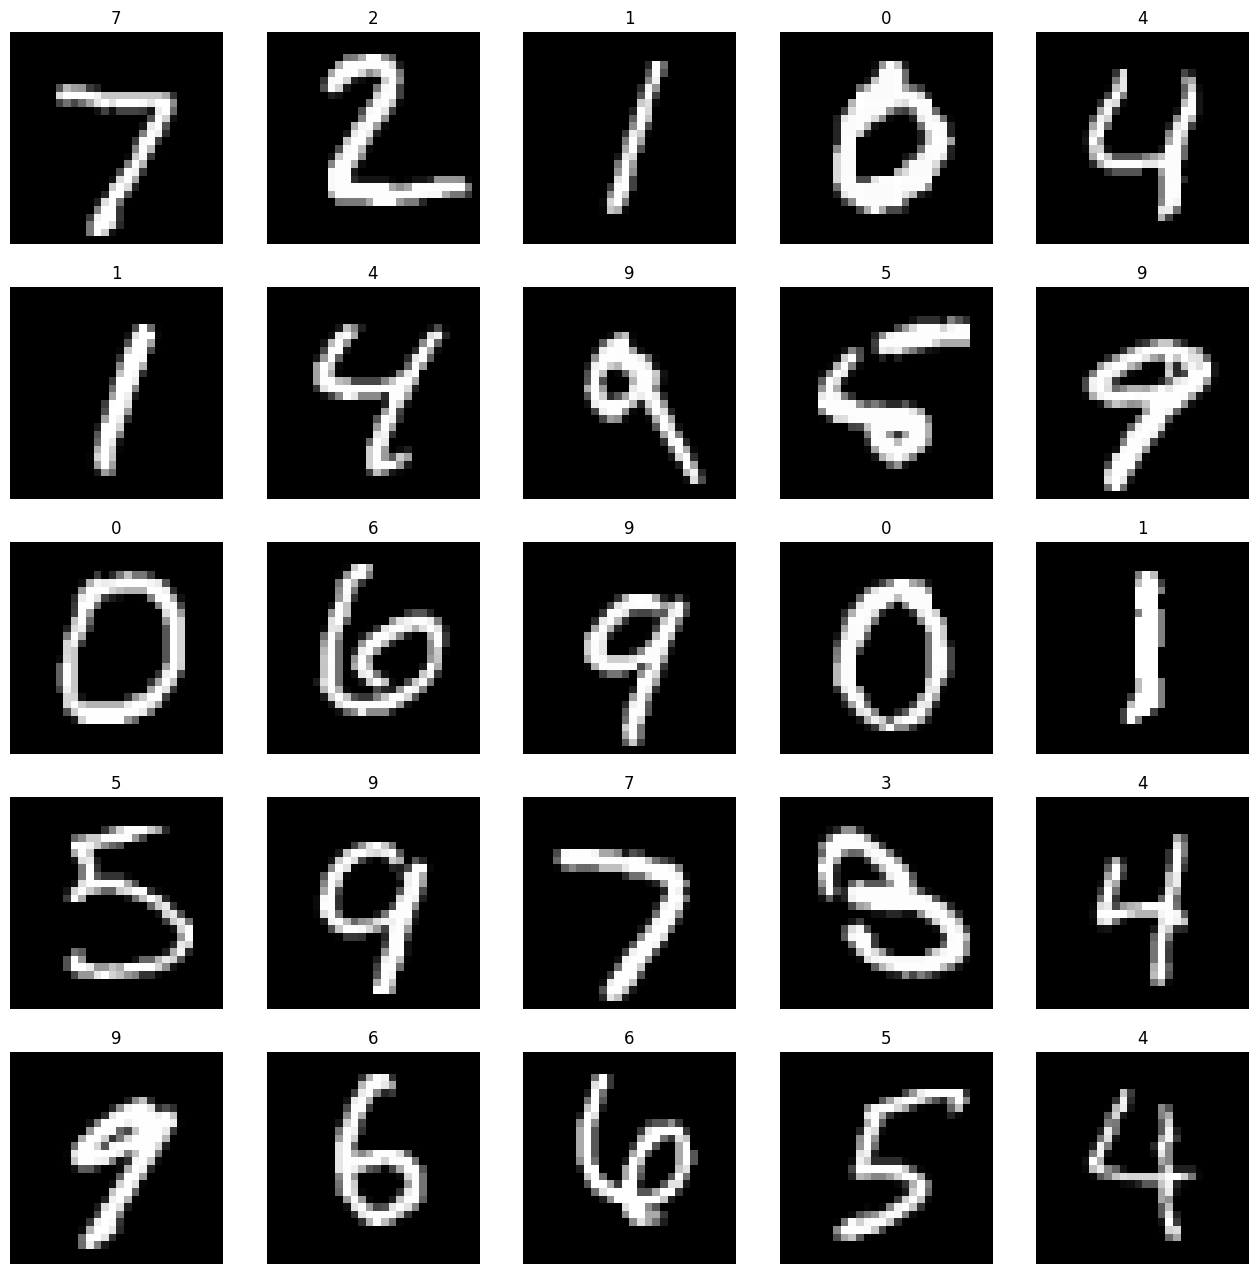

In [8]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap = 'gray')
    plt.axis('off')
    plt.title(y_test[i])

##### Data Preparation

In [9]:
x_train[6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145,
        255, 211,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 237,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

###### Normalize

In [10]:
x_train = x_train / 255
x_test = x_test / 255

###### Convert 2D data to 1D

In [11]:
x_train[0].shape

(28, 28)

In [12]:
x_train[0].size

784

In [13]:
m = np.array([[6,3,1],[8,9,7]])

In [14]:
m

array([[6, 3, 1],
       [8, 9, 7]])

In [15]:
m.flatten()

array([6, 3, 1, 8, 9, 7])

In [16]:
m.reshape(m.size)

array([6, 3, 1, 8, 9, 7])

In [17]:
np.reshape(m, m.size)

array([6, 3, 1, 8, 9, 7])

In [18]:
x_train = x_train.reshape(-1, x_train[0].size)
x_test = x_test.reshape(-1, x_test[0].size)

In [19]:
x_train.shape

(60000, 784)

In [20]:
x_test.shape

(10000, 784)

##### Prepare the output variable

In [21]:
import seaborn as sns

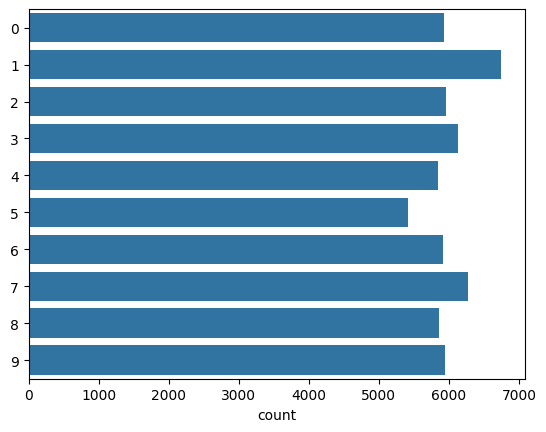

In [22]:
sns.countplot(y = y_train);

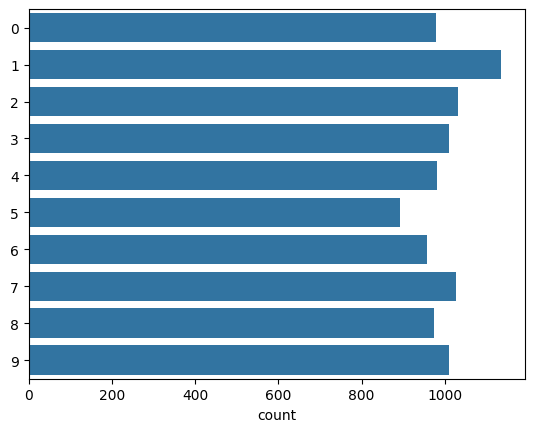

In [23]:
sns.countplot(y = y_test);

In [24]:
y_train.shape

(60000,)

In [25]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
y_train.shape

(60000, 10)

In [27]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

##### Build the model

In [28]:
model = Sequential()

# Input layer
model.add(Dense(512, input_shape=(784,), activation='relu'))

# Hidden Layer
model.add(Dense(128, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


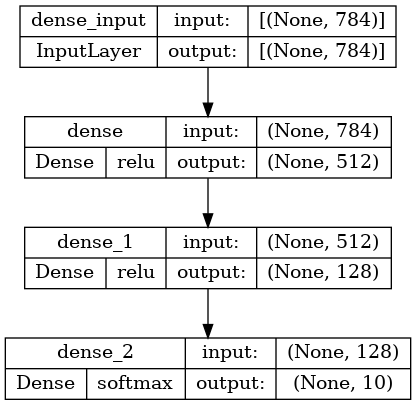

In [30]:
plot_model(model, show_layer_activations=True, show_layer_names=True,
          show_shapes=True)

##### Compile the model

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

##### Train the model

In [32]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.1875 - accuracy: 0.9423
Epoch 2/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0870 - accuracy: 0.9732
Epoch 3/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0637 - accuracy: 0.9805
Epoch 4/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0518 - accuracy: 0.9838
Epoch 5/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0421 - accuracy: 0.9872
Epoch 6/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0352 - accuracy: 0.9898
Epoch 7/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0311 - accuracy: 0.9908
Epoch 8/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0302 - accuracy: 0.9912
Epoch 9/10
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0267 - accuracy: 0.9922
Epoch 10/10
6000/6000 [==============================] - 24s 4ms/step - l

##### Evaluate on test data

In [38]:
model.evaluate(x_test, y_test, batch_size=1)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 784), found shape=(1, 28, 28)


##### Predict on new image

In [35]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [36]:
new = x_test[1234]

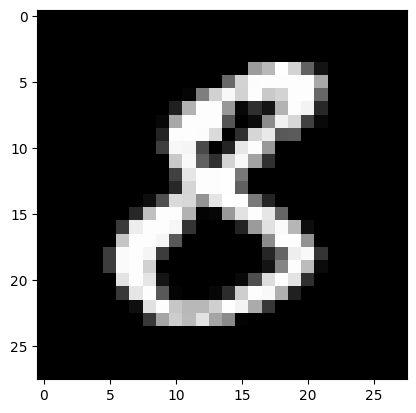

In [37]:
plt.imshow(new, cmap='gray')

In [39]:
new = new / 255
new = new.reshape(1, 784)
result = model.predict(new)
np.argmax(result)

1/1 [==============================] - 0s 56ms/step


8

In [40]:
import cv2

In [52]:
img = cv2.imread('new-char.png',0)

In [53]:
img = cv2.resize(img,(28,28))

In [54]:
img.shape

(28, 28)

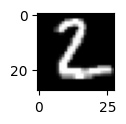

In [57]:
plt.figure(figsize=(1,1))
plt.imshow(img, cmap='gray')

In [49]:
img = img / 255
img = img.reshape(1, 784)
result = model.predict(img)
np.argmax(result)

1/1 [==============================] - 0s 17ms/step


2